(farrow-arbitrary-resampler)=
# Farrow arbitrary resampler

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sdr

%config InlineBackend.print_figure_kwargs = {"facecolor" : "w"}
%matplotlib inline
# %matplotlib widget

sdr.plot.use_style()

## Construct an input signal, $x[n] = x(n T_s)$

Create a discrete-time signal $x[n]$ that sample the continuous-time signal $x(t)$ at a sample rate $f_s = 1 / T_s$.

In [2]:
sample_rate = 1  # samples/s
n = 100  # samples
freq = 0.05  # Hz
tx = np.arange(n) / sample_rate  # Time axis for the input signal
x = np.exp(1j * 2 * np.pi * freq * tx)  # Complex exponential input signal
x *= np.exp(-np.arange(n) / 100)  # Exponential decay

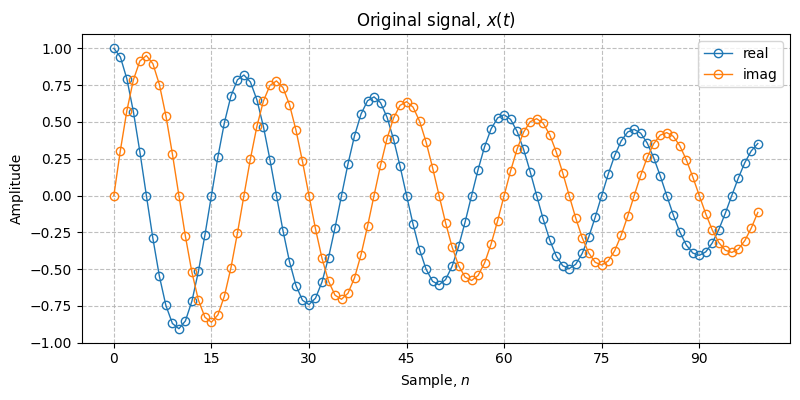

In [3]:
plt.figure()
sdr.plot.time_domain(tx, x, marker="o", fillstyle="none")
plt.title("Original signal, $x(t)$")
plt.show()

## Resample the input signal with rate $r$, $y[n] = x(n \frac{T_s}{r})$

Now, resample $x[n]$ such that the output $y[n]$ is equivalent to sampling the continuous-time $x(t)$
at sample rate $f_s = r/T_s$.
This is equivalent to sampling $x[n]$ at $1/r$ fractional samples.
This is accomplished, for arbitrary $r$, with a Farrow arbitrary resampler.

In the {obj}`sdr` library, the Farrow arbitrary resampler is implemented in {obj}`sdr.FarrowResampler`.

In [4]:
def resample_signal(rate):
    farrow = sdr.FarrowResampler()
    y = farrow(x, rate)
    new_sample_rate = rate * sample_rate
    ty = np.arange(y.size) / new_sample_rate  # Time axis for output signal

    print(f"Input signal length: {x.size}")
    print(f"Output signal length: {y.size}")

    plt.figure()
    sdr.plot.time_domain(tx, x, linestyle="none", marker="o", fillstyle="none", label="Input")
    plt.gca().set_prop_cycle(None)
    sdr.plot.time_domain(ty, y, linestyle="none", marker=".", label="Output")
    plt.title(f"Original $x(t)$ and resampled signal $y(t)$, rate = {rate}")
    plt.show()

## Upsample the signal by an integer rate

When upsampling by 2, notice there are two output samples for every input sample.

Input signal length: 100
Output signal length: 198


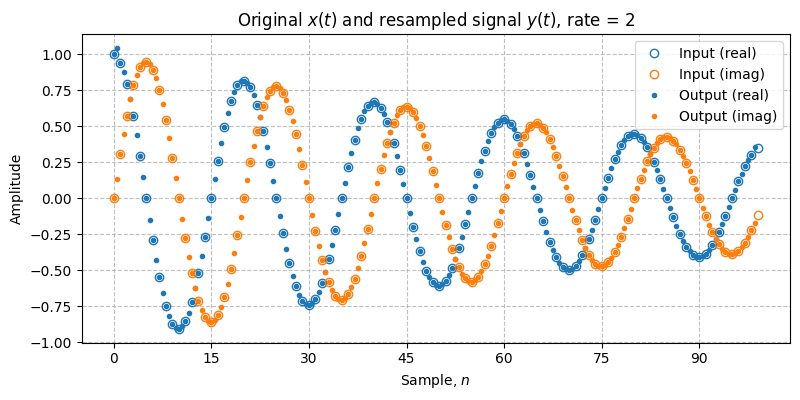

In [5]:
resample_signal(2)

When upsampling by 4, notice there are four output samples for every input sample.

Input signal length: 100
Output signal length: 396


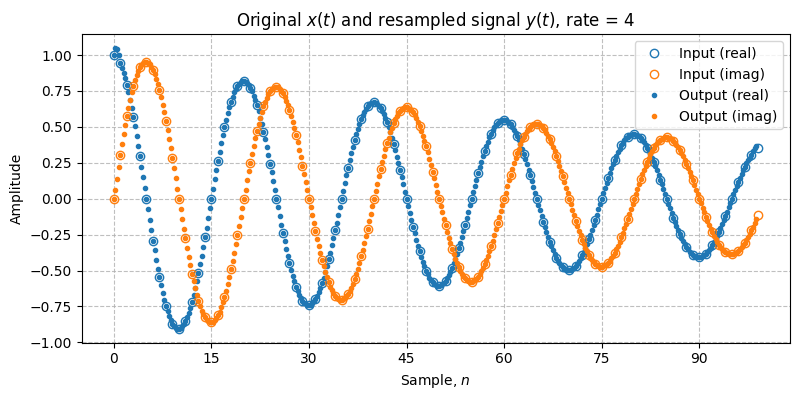

In [6]:
resample_signal(4)

## Downsample the signal by an integer rate

When downsampling by 2, notice every other sample of the input appears at the output.

Input signal length: 100
Output signal length: 50


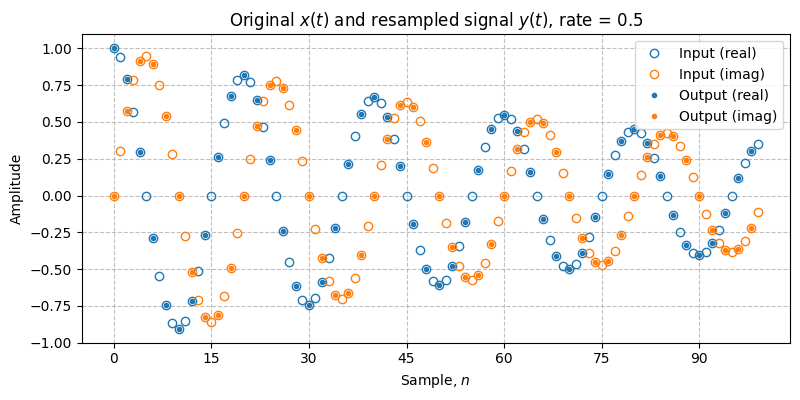

In [7]:
resample_signal(1 / 2)

When downsampling by 4, notice every fourth sample of the input appears at the output.

Input signal length: 100
Output signal length: 25


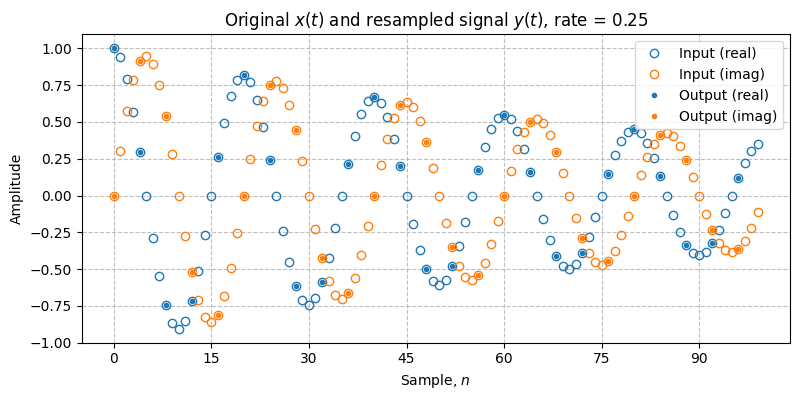

In [8]:
resample_signal(1 / 4)

## Upsample by an irrational rate

When upsampling by $\pi$, notice there are roughly three output samples for every input sample.
However, these samples often do not align with the original input samples.

Input signal length: 100
Output signal length: 312


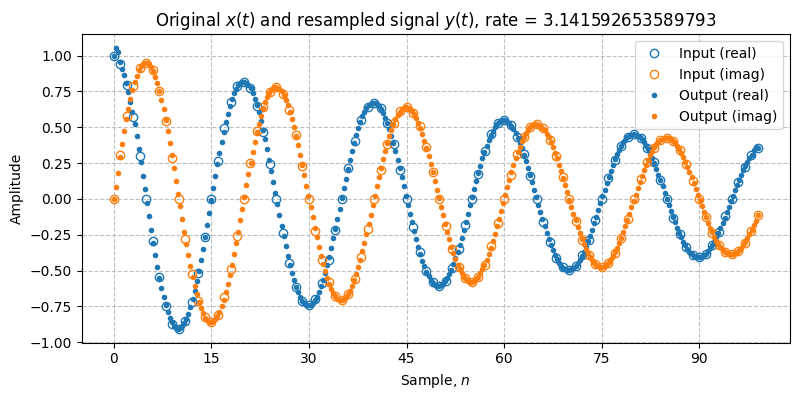

In [9]:
resample_signal(np.pi)

## Downsample by an irrational rate

When downsampling by $\pi$, notice there are roughly three input samples for every output sample.
However, these samples often do not align with the original input samples.

Input signal length: 100
Output signal length: 32


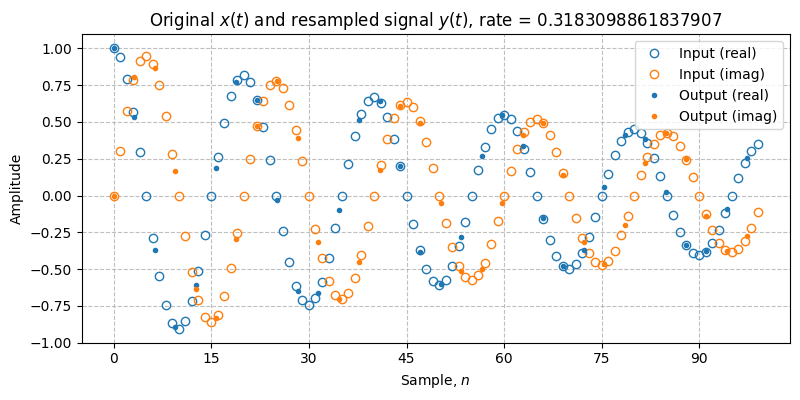

In [10]:
resample_signal(1 / np.pi)